In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Supermarket_Customers_data_v2.csv", delimiter=';')
df

,Customer_ID,Sex,Age,Annual Income (k$),Spending Score (1-100): Score assigned by the shop based on customer behavior and spending nature
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
1077,1078,Female,36,43,19
1078,1079,Male,18,74,60
1079,1080,Male,36,49,62
1080,1081,Male,23,90,91


In [3]:
X = df.iloc[:, [3,4]].values
X[0:5]

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10, random_state=0 )
kmeans.n_clusters
y_kmeans = kmeans.fit_predict(X)
type(y_kmeans)


df['cluster'] = y_kmeans
df.head()
print(y_kmeans.shape)
print(y_kmeans.dtype)
df.head

(1082,)
int32


<bound method NDFrame.head of       Customer_ID     Sex  Age  Annual Income (k$)  \
0               1    Male   19                  15   
1               2    Male   21                  15   
2               3  Female   20                  16   
3               4  Female   23                  16   
4               5  Female   31                  17   
...           ...     ...  ...                 ...   
1077         1078  Female   36                  43   
1078         1079    Male   18                  74   
1079         1080    Male   36                  49   
1080         1081    Male   23                  90   
1081         1082    Male   25                  75   

      Spending Score (1-100): Score assigned by the shop based on customer behavior and spending nature  \
0                                                    39                                                   
1                                                    81                                                   


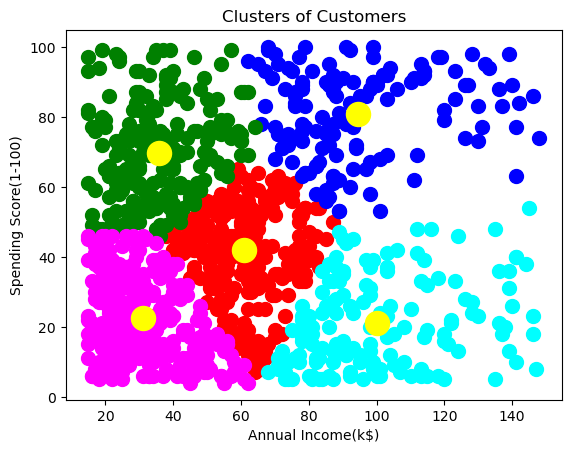

In [4]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()
